In [1]:
from src.input_json import file_name, open_json
from src.ffnn import FFNN
import numpy as np

### Defining Forward Propagation Function

In [2]:
def forward_propagation_ffnn(input_file_name):
    checked_file_name = file_name(input_file_name)
    case, expect = open_json(checked_file_name)
    model = FFNN(case)
    input = case.get("input")
    output = model.predict(input)
    output_val = FFNN.output_value(output)
    sse = FFNN.f_sse(output_val, expect.get("output"))
    return model, input, output, sse

### Visualizing Model

In [82]:
import matplotlib.pyplot as plt
def visualize_model(model, input, name=''):
    fig, ax = plt.subplots(figsize=(8, 4))

    layer_sizes = [model.input_size] + list(model.layers.layer_sizes) + [model.layers.n_output]

    for i, layer_size in enumerate(layer_sizes):
        if len(layer_sizes) > 2 and i != len(layer_sizes)-1:
            for j in range(int(layer_size)):
                x = i / (len(layer_sizes) - 1)
                y = (j + 1) / (layer_size + 1)

                if i == 0:
                    ax.scatter(x, y, color='blue', s=400)
                    node_name = 'x'

                    # Display node value
                    ax.text(x, y, f'{input[j]:.2f}', ha='center', va='center', fontsize=8, color='white')

                    # Display node name
                    ax.text(x, y-0.05, f'{node_name}{j}', ha='center', va='center', fontsize=8, color='black')
                else:
                    ax.scatter(x, y, color='black', s=400)
                    # Display node value
                    if len(model.layers.layers[i-1].value) == 0:
                        ax.text(x, y, f'-', ha='center', va='center', fontsize=8, color='white')
                    else:
                        ax.text(x, y, f'{model.layers.layers[i-1].value[j-1]:.2f}', ha='center', va='center', fontsize=8, color='white')

                    # Display node name
                    ax.text(x, y-0.05, f'h{model.layers.layers[i-1].node[j-1].name}', ha='center', va='center', fontsize=8, color='black')

                    # Display activation function name
                    if i != 0 and i != len(layer_sizes) - 2:
                        if len(model.layers.layers[i-1].value) == 0:
                            ax.text(x, y+0.05, f'-', ha='center', va='center', fontsize=8, color='black')
                        else:
                            ax.text(x, y+0.05, f'{model.layers.layers[i-1].activation_function_name}', ha='center', va='center', fontsize=8, color='black')

        # Plot bias value
        if i != len(layer_sizes) - 2:
            bias_x = i / (len(layer_sizes) - 2)
            bias_y = 0.0 
            bias_value = model.layers.layers[i - 1].bias
            ax.scatter(bias_x, bias_y, color='grey', s=400) 
            ax.text(bias_x, bias_y, f'{bias_value:.2f}', ha='center', va='center', fontsize=8, color='white') 

    # Plot connections between neurons
    for i in range(len(layer_sizes) - 2):
        for j in range(int(layer_sizes[i])):
            for k in range(int(layer_sizes[i+1])):
                x_values = [i / (len(layer_sizes) - 1), (i + 1) / (len(layer_sizes) - 1)]
                y_values = [(j + 1) / (layer_sizes[i] + 1), (k + 1) / (layer_sizes[i+1] + 1)]
                ax.plot(x_values, y_values, color='black', linewidth=1)
                ax.text((x_values[0]+x_values[1])/2, (y_values[0]+y_values[1])/2, f'{model.layers.layers[i-1].weight[j-1][k-1]:.2f}', ha='center', va='center', fontsize=8, color='black')


    # Hide axes and set title
    ax.axis('off')
    ax.set_title(f'{name} Neural Network Diagram')

    plt.show()

In [70]:
def print_process(input_file_name):
    this_model, this_input, this_output, this_sse = forward_propagation_ffnn(input_file_name)
    for i in range(len(this_input)):
        visualize_model(this_output[i], this_input[i], input_file_name)

IndexError: list index out of range

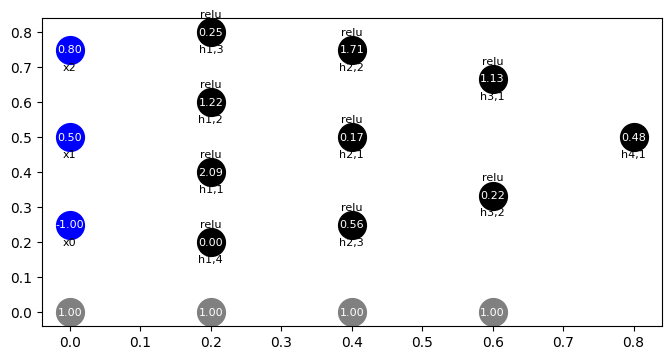

In [83]:
print_process('multilayer.json')